In [ ]:
#hide
import sys
sys.path.append('..')

# Fastseq

> A way to use fastai with sequence data

This file will become your README and also the index of your documentation.

## How to use

In [ ]:
from fastseq.core import *
from fastseq.data.external import *
from fastseq.data.load import *
from fastai2.basics import *
from fastseq.models.dnn import *

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
path

Path('/home/tako/.fastai/data/m4_daily')

In [ ]:
df_train = pd.read_csv(path/'train.csv',skiprows=skip)
df_test = pd.read_csv(path/'val.csv')
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,D1,2039.20,2035.00,2051.80,2061.8,2063.50,2069.5,2054.00,2057.00,2062.80,2066.40,2067.40,2071.40,2083.80,2080.60
1,D2,2986.00,3001.20,2975.90,2996.1,2981.90,2985.5,2975.80,2956.20,2964.70,2989.00,2991.40,3024.90,3070.80,3076.90
2,D3,1120.70,1117.90,1115.10,1112.3,1109.50,1106.7,1103.90,1101.10,1098.30,1095.50,1092.70,1089.90,1087.10,1084.30
3,D4,1190.00,1162.00,1134.00,1106.0,1078.00,1050.0,1022.00,994.00,966.00,938.00,910.00,1428.00,1400.00,1372.00
4,D5,5904.67,5917.05,5922.58,5928.8,5935.29,6002.8,6009.47,6014.82,6020.19,6072.49,6077.72,6080.23,6082.75,6108.07


In [ ]:
horizon = 12
lookback = 128

In [ ]:
train = df_train.iloc[:, 1:].values
test = df_test.iloc[:, 1:].values

In [ ]:
train_dl = DataLoader(TimeSeriesDataset(ts_lists(train),
                                     lookback,
                                     horizon,
                                     step=1,
                                     static_covs = [1,2,2,2,2],
                                     transform = ToTensor()
                                    ),
                   batch_size=64,
                   shuffle=True,
                   pin_memory=True,
                   num_workers=1,                  
                  )

test_dl = DataLoader(TimeSeriesDataset(ts_lists(test),
                                     lookback,
                                     horizon,
                                     step=1,
                                     static_covs = [1,2,2,2,2],
                                     transform = [ToTensor(),Cuda()]
                                    ),
                   batch_size=64,
                   shuffle=False,
                   pin_memory=True,
                   num_workers=1,                  
                  )

In [ ]:
model = DNN(input_channels=1,
            output_channels=1,
            horizon=horizon,
            lookback = lookback
           )

print('Number of model parameters: {}.'.format(model.n_parameters))

Number of model parameters: 114944.


In [ ]:
data = DataBunch(train_dl, test_dl).cuda()
learn = Learner(data, model, loss_func = F.mse_loss, opt_func= Adam, metrics=accuracy)

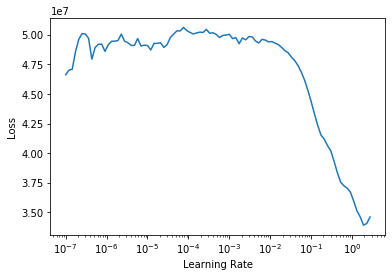

In [ ]:
from fastai2.callback.all import *
learn.lr_find()